# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# 6.1 Policy Evaluation by Dynamic Programming

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# distribution over actions given states
policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
# 'raw_rewards' variable contains rewards obtained after transition to each state
# In our example it doesn't depend on source state
raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
# 'rewards' variable contains expected values of the next reward for each state
rewards = np.matmul(policy, raw_rewards)
assert np.allclose(rewards, np.array([10., 2., 3.]))

state_value_function=np.array([0 for i in range(3)])

# discount rate
dr = 0.1
for i in range(20):
    print(state_value_function)
    print('V_{}={}'.format(i, state_value_function))
    state_value_function = rewards + dr * (np.matmul(policy, state_value_function))
print(state_value_function)

[0 0 0]
V_0=[0 0 0]
[10.  2.  3.]
V_1=[10.  2.  3.]
[10.49  2.61  3.85]
V_2=[10.49  2.61  3.85]
[10.5594  2.6674  3.9038]
V_3=[10.5594  2.6674  3.9038]
[10.56532   2.673704  3.910464]
V_4=[10.56532   2.673704  3.910464]
[10.56595688  2.6743188   3.91106728]
V_5=[10.56595688  2.6743188   3.91106728]
[10.56601845  2.67438127  3.91113041]
V_6=[10.56601845  2.67438127  3.91113041]
[10.5660247   2.67438748  3.91113659]
V_7=[10.5660247   2.67438748  3.91113659]
[10.56602532  2.6743881   3.91113722]
V_8=[10.56602532  2.6743881   3.91113722]
[10.56602538  2.67438816  3.91113728]
V_9=[10.56602538  2.67438816  3.91113728]
[10.56602539  2.67438817  3.91113728]
V_10=[10.56602539  2.67438817  3.91113728]
[10.56602539  2.67438817  3.91113729]
V_11=[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
V_12=[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
V_13=[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
V_14=[10.56602539 

# 6.1 Policy Evaluation by Linear Programming

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [3]:
solution = np.linalg.inv(np.eye(*policy.shape) - dr * policy) @ rewards
print(solution)

[10.56602539  2.67438817  3.91113729]


The result stays the same.

# 6.2 Monte Carlo Policy Evaluation


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [4]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    # Total discounted reward
    t = np.sum(np.array(rewardlist) * (gamma ** np.arange(len(rewardlist))))
    return t


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            #break #if break: return following only the first visit

print(reward_counter/visit_counter)

[10.56420677  2.66922723  3.9047328 ]


As can be seen the result is nearly the same as the state-value-function calculated above.

# 6.2 Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [5]:
q_table=np.zeros((3, 3)) 
gamma = 0.1
alpha = 1.0
for i in range(1001): 
    state=random.randint(0, 2) 
    action=random.randint(0, 2) 
    next_state=action
    reward=rewards[next_state] 
    next_q=max(q_table[next_state])
    # Implement the Q-Table update
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * next_q)
    if i%100==0:
        print(q_table)

[[0. 0. 0.]
 [0. 0. 3.]
 [0. 0. 0.]]
[[11.11111023  3.11111023  4.1111111 ]
 [11.11111102  3.1111111   4.1111111 ]
 [11.11111102  3.1111111   4.1111111 ]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11

# 6.3 Score Function Gradient Estimator
Implement the score function gradient estimator in lxmls/reinforcement_learning/score\_function\_estimator.py. Check it is correct by calling the train() function.

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[1.0, 0.2, 0.2, 0.3, 0.3, 1.0, 0.2, 0.2, 1.0, 0.3, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 0.2, 0.2, 0.3, 0.3, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.2]


/home/dsilva/projects/lxmls-toolkit/lxmls/reinforcement_learning/score_function_estimator.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  poli = torch.nn.functional.softmax(model.t_policy).data.numpy()
/home/dsilva/projects/lxmls-toolkit/lxmls/reinforcement_learning/score_function_estimator.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = torch.nn.functional.log_softmax(self.t_policy)


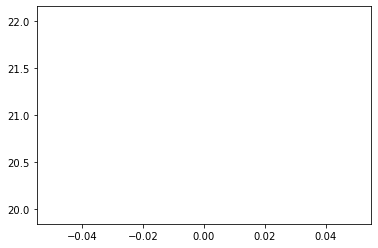

[[0.36758357 0.32829577 0.30412063]
 [0.3808025  0.3292271  0.28997043]
 [0.34973526 0.2951885  0.3550763 ]]
[0.3, 0.3, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 0.3, 0.3, 0.3, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 0.2, 0.2, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 0.3, 1.0]


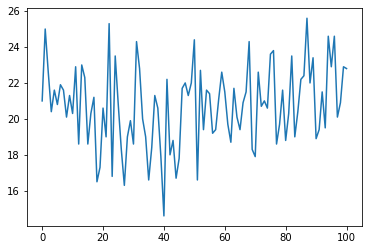

[[0.31750882 0.3548811  0.32761008]
 [0.35229427 0.35476297 0.29294276]
 [0.41036856 0.27208224 0.31754926]]
[0.2, 1.0, 0.3, 1.0, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.3, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 0.2, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 0.2, 0.3, 0.3, 1.0, 1.0, 0.3, 0.3, 0.3]


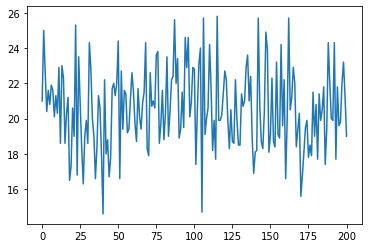

[[0.29747105 0.37684563 0.3256833 ]
 [0.33283016 0.38384184 0.28332794]
 [0.45928285 0.24976653 0.2909507 ]]
[0.2, 0.2, 1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 0.3, 0.3, 1.0, 0.3, 0.3, 1.0, 0.2, 0.3, 0.2, 1.0, 0.3, 0.3, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2]


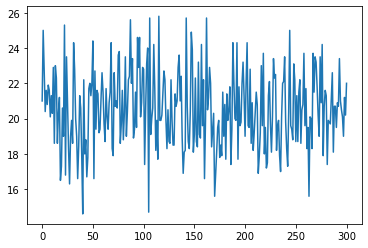

[[0.3296476  0.32050672 0.34984565]
 [0.34753236 0.33585706 0.31661057]
 [0.51408726 0.22891709 0.2569956 ]]
[0.2, 0.2, 1.0, 0.3, 0.3, 0.2, 0.2, 0.3, 1.0, 0.2, 1.0, 0.3, 0.3, 1.0, 0.2, 0.2, 0.3, 1.0, 0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 0.2, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 0.2]


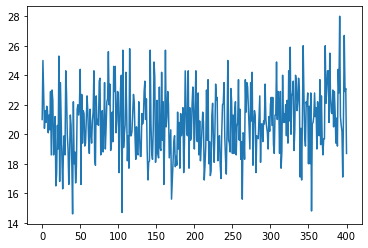

[[0.33770937 0.32985845 0.33243218]
 [0.38280722 0.32904807 0.28814465]
 [0.4999553  0.23033658 0.26970816]]
[1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 0.3, 1.0, 0.2, 1.0, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.2, 0.2]


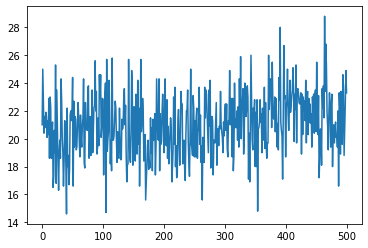

[[0.41494012 0.2845526  0.30050728]
 [0.41117322 0.3308982  0.25792858]
 [0.5574334  0.19757769 0.24498893]]
[0.3, 1.0, 0.3, 0.2, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 0.3]


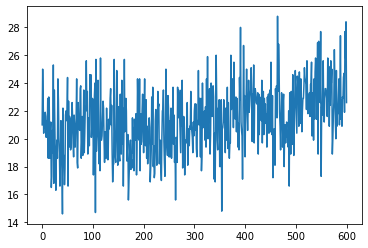

[[0.42089686 0.2914295  0.28767365]
 [0.4296276  0.31830588 0.25206643]
 [0.61883616 0.17232655 0.2088372 ]]
[0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 0.2, 0.2, 0.3, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0]


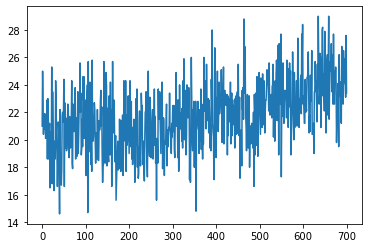

[[0.43758854 0.23182736 0.33058408]
 [0.49264365 0.30306646 0.20428991]
 [0.64488226 0.16650625 0.18861143]]
[0.2, 1.0, 0.3, 0.3, 1.0, 0.2, 0.3, 0.3, 0.3, 0.2, 0.2, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2]


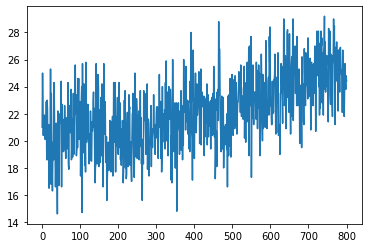

[[0.4757953  0.21893568 0.3052691 ]
 [0.4785393  0.3403514  0.18110928]
 [0.62153953 0.16726033 0.21120018]]
[0.3, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0]


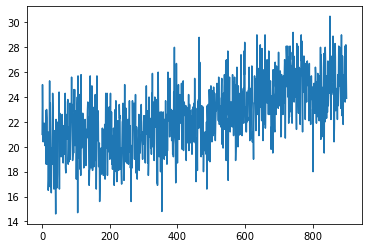

[[0.4689291  0.22631146 0.30475944]
 [0.48249334 0.3498462  0.16766046]
 [0.68542457 0.13738656 0.1771889 ]]
[0.3, 1.0, 0.3, 0.2, 0.2, 0.2, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 0.3, 1.0, 0.2, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 0.3]


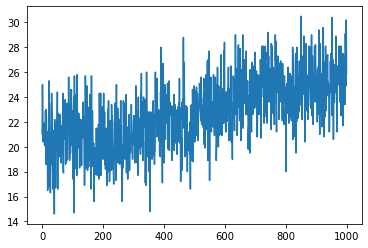

[[0.4769674  0.21370304 0.3093295 ]
 [0.46760654 0.36015597 0.1722375 ]
 [0.71145535 0.12687182 0.16167274]]
[0.2, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.2, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0]


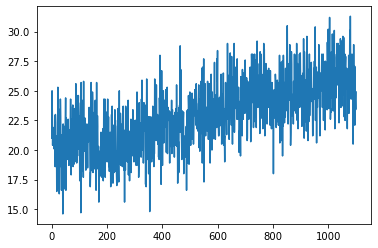

[[0.42720503 0.20787822 0.3649167 ]
 [0.46078038 0.34371072 0.1955089 ]
 [0.72777355 0.12116349 0.15106295]]
[0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 0.2, 0.2, 0.2, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3]


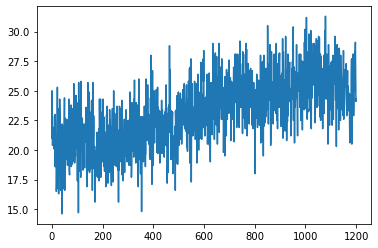

[[0.49964264 0.19559452 0.30476296]
 [0.46999773 0.3234778  0.20652455]
 [0.7505618  0.10879996 0.14063826]]
[1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.3, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 0.3, 0.2, 0.2, 1.0, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 0.3]


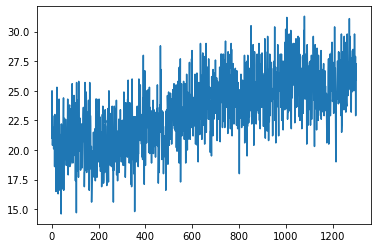

[[0.5472141  0.1845197  0.26826623]
 [0.5016199  0.32045206 0.1779281 ]
 [0.7217183  0.11834668 0.15993497]]
[0.3, 0.3, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0]


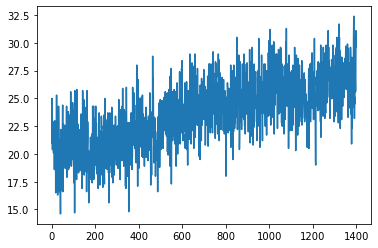

[[0.52655226 0.1864341  0.2870137 ]
 [0.49236357 0.30344278 0.20419362]
 [0.71938294 0.11503056 0.1655865 ]]
[0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.2, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0]


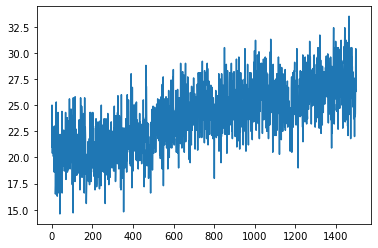

[[0.6549066  0.15356551 0.19152783]
 [0.47208282 0.2993368  0.22858037]
 [0.7449178  0.10304408 0.15203807]]
[1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 0.2]


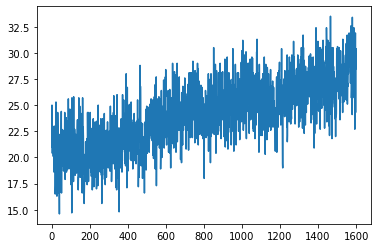

[[0.6693464  0.13998617 0.19066738]
 [0.47986838 0.28354186 0.23658982]
 [0.7610238  0.09672836 0.14224783]]
[1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 0.3, 0.2, 1.0]


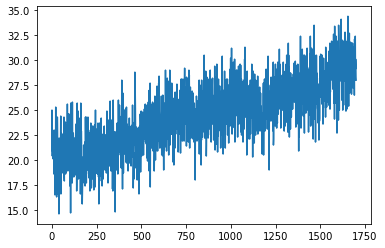

[[0.6504098  0.14380713 0.20578305]
 [0.45141923 0.26483408 0.28374663]
 [0.78062063 0.09285623 0.12652309]]
[1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0]


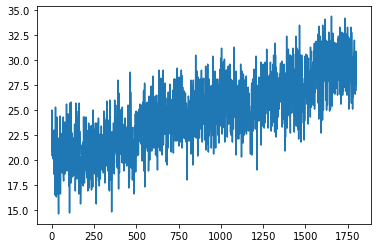

[[0.721364   0.10600869 0.17262733]
 [0.48962924 0.2616037  0.24876703]
 [0.778702   0.09455916 0.12673874]]
[0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


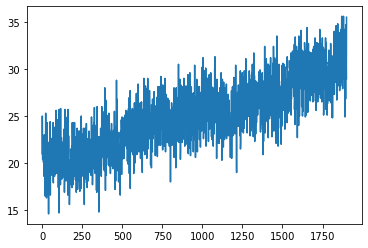

[[0.784331   0.06614745 0.14952148]
 [0.51038593 0.24476257 0.2448515 ]
 [0.8118712  0.07535151 0.11277725]]
[1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0]


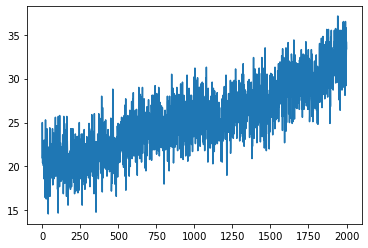

[[0.8277888  0.05550734 0.11670388]
 [0.51504236 0.23859946 0.24635814]
 [0.8212967  0.07262173 0.10608151]]
[1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


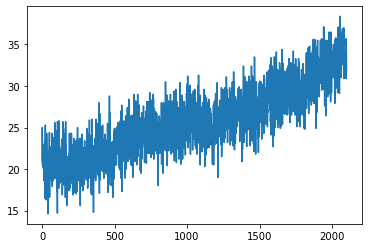

[[0.81379586 0.05159251 0.13461153]
 [0.5431418  0.22151892 0.23533925]
 [0.81982535 0.07068395 0.10949067]]
[0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0]


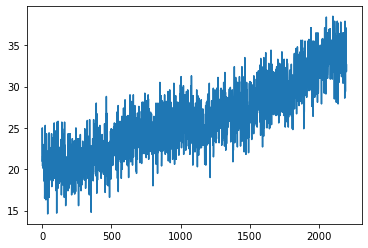

[[0.86399704 0.04486667 0.09113621]
 [0.5785591  0.20354916 0.21789172]
 [0.81737214 0.07167921 0.11094861]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0]


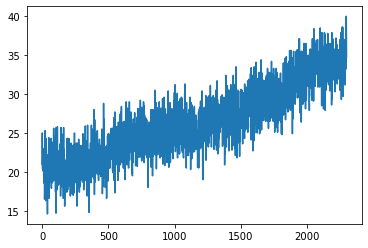

[[0.8806618  0.04016618 0.07917204]
 [0.5743433  0.20086004 0.22479658]
 [0.835049   0.06824246 0.09670858]]
[1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3]


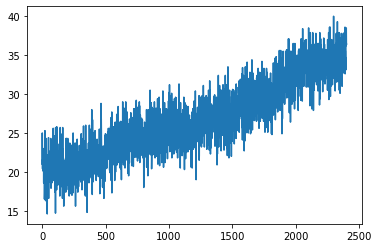

[[0.8676085  0.04515656 0.08723497]
 [0.57656074 0.19256099 0.23087825]
 [0.8346751  0.06550821 0.09981676]]
[1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3]


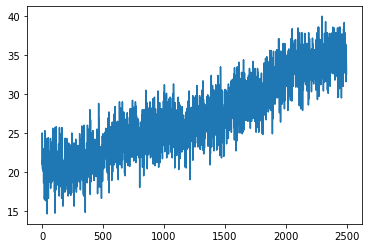

[[0.8494005  0.05251849 0.09808107]
 [0.5670163  0.19914183 0.23384184]
 [0.84822494 0.0588184  0.09295659]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0]


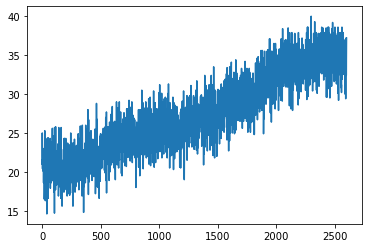

[[0.8571768  0.04824189 0.09458126]
 [0.56715375 0.2022643  0.23058195]
 [0.8546306  0.05822141 0.08714794]]
[0.2, 1.0, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0]


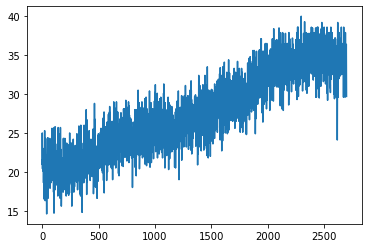

[[0.8844032  0.03847459 0.07712225]
 [0.58473897 0.19789405 0.217367  ]
 [0.85930496 0.0541229  0.08657219]]
[0.3, 0.2, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


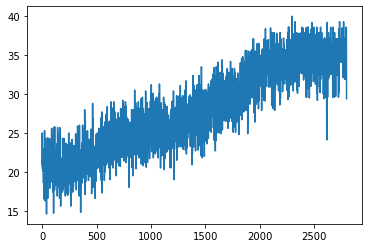

[[0.8453026  0.04253471 0.11216262]
 [0.58433086 0.190797   0.22487207]
 [0.8519879  0.05659846 0.09141371]]
[1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


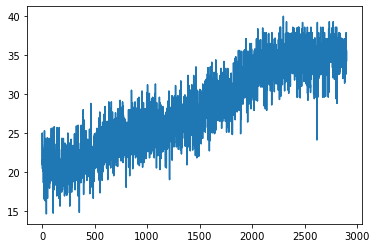

[[0.8921776  0.03800066 0.06982176]
 [0.5913169  0.1894424  0.21924071]
 [0.8384945  0.05922171 0.10228379]]
[1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


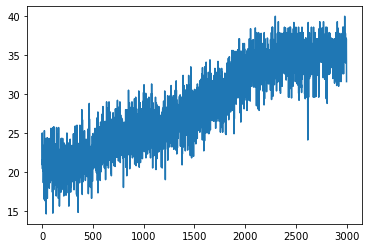

[[0.8611818  0.03993136 0.09888681]
 [0.5703004  0.20038389 0.22931562]
 [0.8353724  0.06071124 0.10391639]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3]


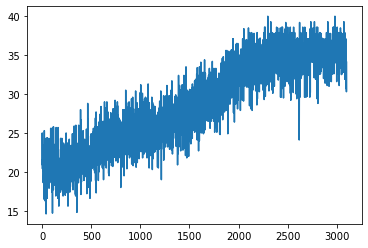

[[0.88869303 0.03818132 0.07312562]
 [0.59559464 0.1791333  0.22527203]
 [0.8256643  0.06913847 0.10519721]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3]


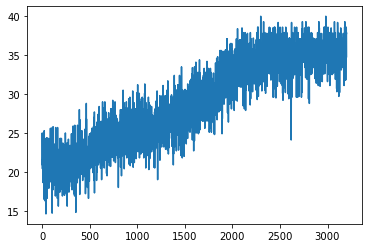

[[0.9070648  0.03376302 0.05917221]
 [0.63254416 0.16512798 0.20232792]
 [0.8427675  0.06136265 0.09586986]]
[0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


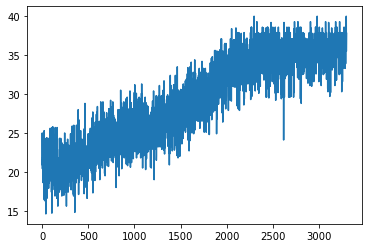

[[0.9247969  0.02472201 0.0504811 ]
 [0.6652066  0.15054332 0.1842501 ]
 [0.832695   0.06551031 0.10179465]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]


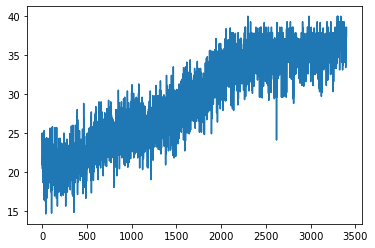

[[0.93387026 0.02121346 0.04491625]
 [0.675326   0.15013306 0.17454094]
 [0.8411618  0.0616108  0.09722734]]
[0.2, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


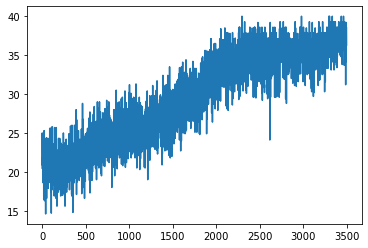

[[0.94629884 0.01853993 0.03516125]
 [0.6572631  0.16178478 0.18095212]
 [0.8431884  0.06146714 0.09534444]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


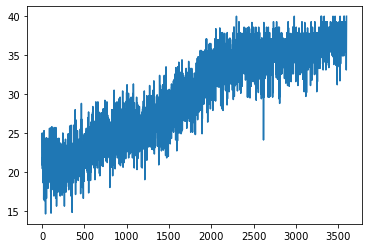

[[0.95337355 0.01770798 0.02891847]
 [0.6567541  0.15956888 0.18367709]
 [0.8450427  0.06125446 0.09370282]]
[0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2]


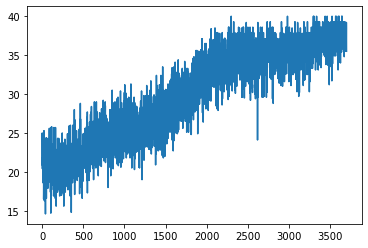

[[0.9653306  0.01313395 0.02153547]
 [0.61175615 0.17952007 0.20872377]
 [0.8384724  0.06557488 0.0959527 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


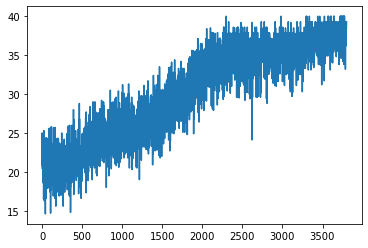

[[0.96438617 0.01352833 0.02208547]
 [0.5959602  0.18109769 0.22294216]
 [0.8433953  0.0629762  0.09362853]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0]


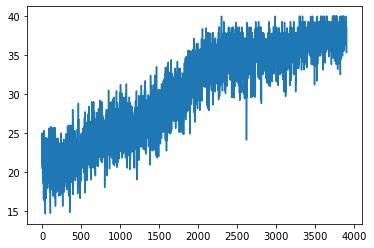

[[0.9705555  0.01121126 0.01823327]
 [0.61614007 0.17347282 0.2103871 ]
 [0.84758    0.06257987 0.0898401 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


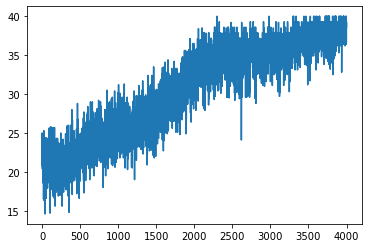

[[0.9694336  0.01194378 0.01862261]
 [0.62334174 0.16359378 0.21306449]
 [0.84533465 0.06679529 0.08787005]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


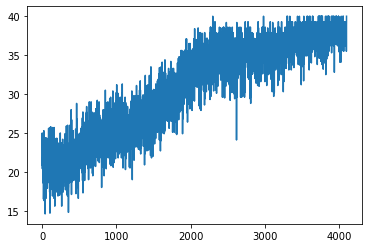

[[0.9652462  0.01146711 0.02328668]
 [0.6159397  0.16931142 0.21474893]
 [0.842722   0.06722564 0.09005236]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


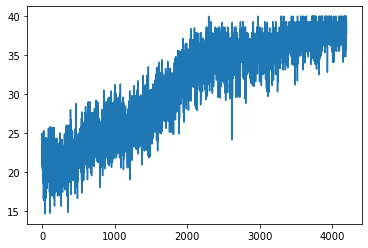

[[0.9606524  0.01232378 0.0270238 ]
 [0.6359711  0.16170187 0.20232697]
 [0.85847175 0.05860782 0.08292042]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


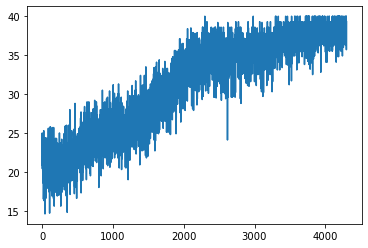

[[0.9651496  0.01003224 0.02481825]
 [0.62583125 0.1607079  0.21346088]
 [0.85888606 0.05818991 0.08292399]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


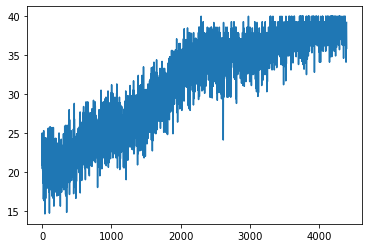

[[0.9675367  0.00942382 0.02303951]
 [0.6328288  0.16230066 0.20487055]
 [0.85797817 0.05730892 0.08471291]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3]


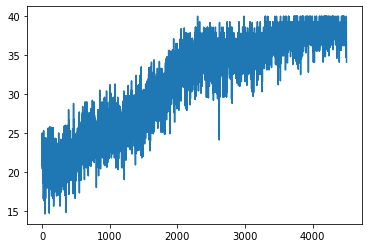

[[0.96492904 0.0099114  0.02515955]
 [0.6296258  0.16176331 0.20861089]
 [0.85056365 0.06012386 0.08931255]]
[0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


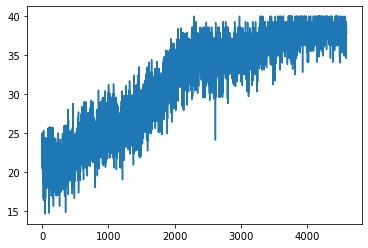

[[0.9660412  0.01002246 0.02393635]
 [0.6225686  0.167296   0.21013543]
 [0.8520831  0.06028639 0.0876305 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


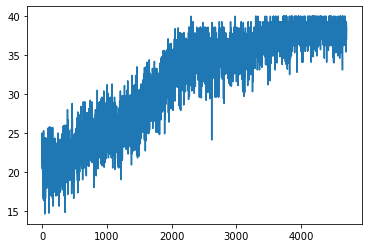

[[0.97024846 0.00940764 0.02034393]
 [0.6232772  0.16491713 0.21180572]
 [0.8488727  0.06219828 0.08892899]]
[0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


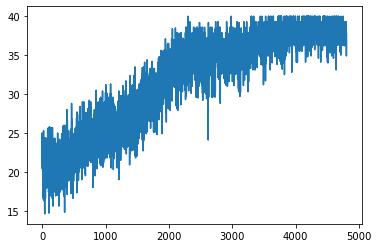

[[0.9688581  0.00897244 0.02216935]
 [0.61770016 0.16757947 0.21472041]
 [0.8506513  0.06251571 0.08683292]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


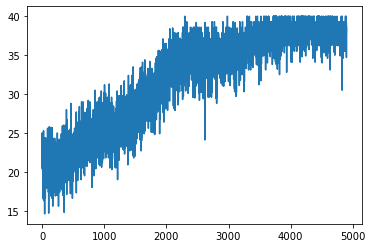

[[0.9745078  0.00752022 0.01797201]
 [0.6186573  0.17069149 0.21065128]
 [0.85403407 0.0632192  0.08274675]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


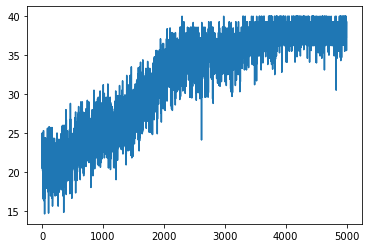

[[0.97605115 0.00686404 0.01708474]
 [0.6075722  0.17689449 0.21553333]
 [0.852374   0.06471126 0.0829147 ]]
[0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


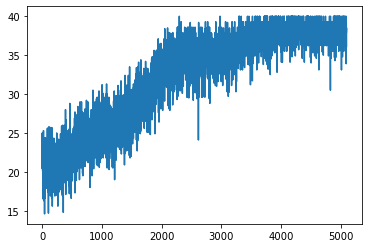

[[0.9751251  0.0069824  0.01789245]
 [0.596712   0.18270451 0.22058345]
 [0.85490245 0.06317229 0.08192526]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


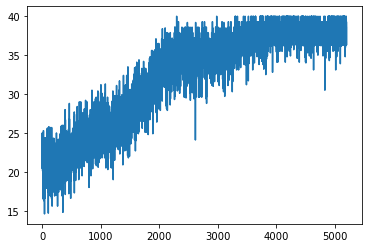

[[0.9723573  0.00804018 0.01960262]
 [0.61432296 0.17350377 0.21217321]
 [0.8542854  0.06380281 0.08191182]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


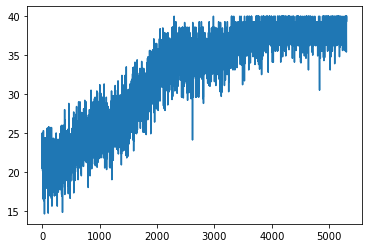

[[0.9760243  0.00751427 0.01646134]
 [0.6271617  0.1670457  0.20579259]
 [0.85389525 0.06264249 0.0834622 ]]
[1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


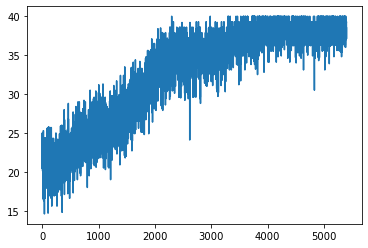

[[0.9699462  0.00876318 0.02129055]
 [0.63464797 0.16574153 0.19961044]
 [0.86349094 0.05905933 0.07744975]]
[0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


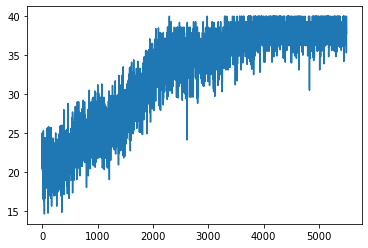

[[0.97187537 0.00812442 0.02000015]
 [0.6458019  0.15631443 0.19788362]
 [0.8682155  0.05835027 0.07343419]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


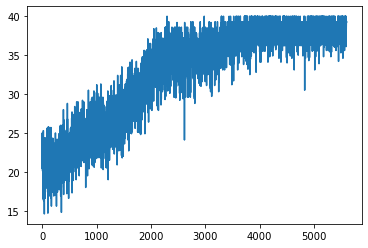

[[0.97278905 0.00844637 0.01876466]
 [0.65433264 0.14951207 0.19615532]
 [0.87200004 0.05691855 0.07108148]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0]


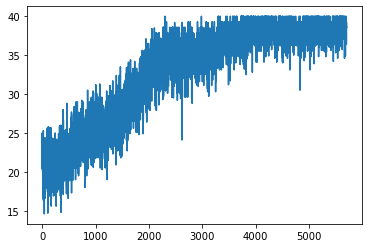

[[0.97028244 0.008586   0.02113148]
 [0.64471585 0.15643771 0.19884647]
 [0.87220865 0.05705854 0.07073276]]
[0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


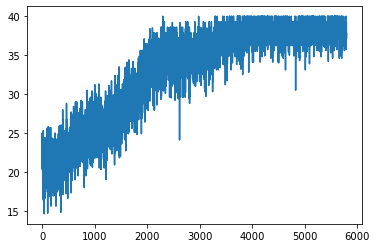

[[0.9735484  0.00776019 0.01869145]
 [0.6608537  0.15015517 0.18899119]
 [0.873264   0.05451155 0.07222445]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


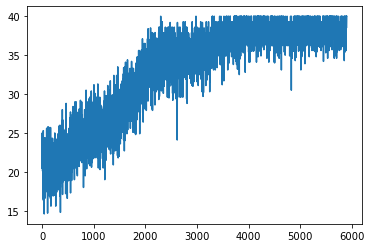

[[0.9709273  0.00806532 0.02100735]
 [0.67250156 0.14330071 0.18419772]
 [0.87359804 0.0557908  0.07061118]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0]


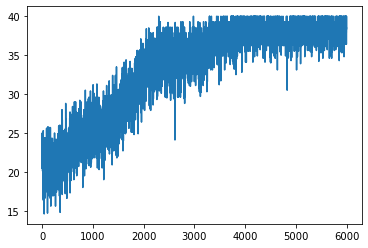

[[0.97605366 0.00725728 0.01668914]
 [0.68393165 0.13811609 0.17795219]
 [0.8763365  0.05516345 0.06850006]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


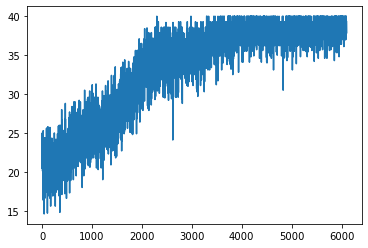

[[0.97968364 0.00659272 0.01372352]
 [0.6903958  0.13282609 0.1767782 ]
 [0.8755639  0.05540163 0.06903447]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


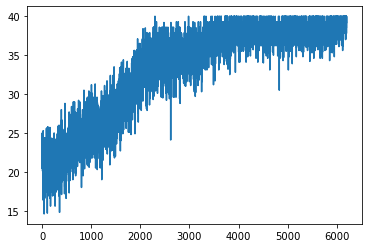

[[0.98197764 0.00617144 0.01185087]
 [0.68542176 0.13741809 0.17716019]
 [0.8738011  0.05649526 0.06970359]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0]


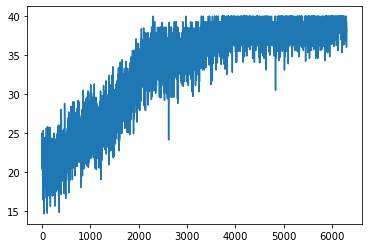

[[0.9823967  0.00644026 0.01116306]
 [0.70171994 0.13135643 0.16692363]
 [0.8741279  0.0570622  0.06880983]]
[0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


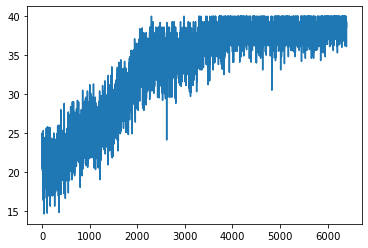

[[0.9853532  0.00560575 0.0090411 ]
 [0.6922364  0.13399406 0.17376953]
 [0.8721151  0.0579678  0.06991711]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0]


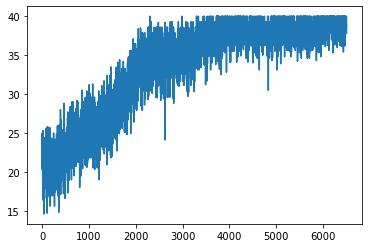

[[0.98595923 0.00534681 0.00869401]
 [0.681185   0.13912338 0.17969167]
 [0.8744464  0.05734281 0.06821089]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


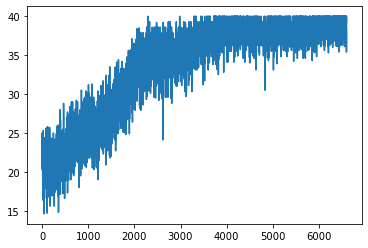

[[0.9872558  0.00492453 0.00781972]
 [0.66549677 0.1427841  0.19171913]
 [0.8748342  0.05784572 0.06732014]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


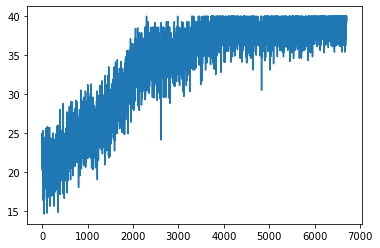

[[0.98442286 0.0059772  0.00959985]
 [0.67523265 0.14189485 0.18287253]
 [0.871777   0.05846931 0.06975374]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


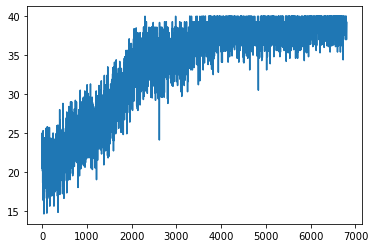

[[0.98535305 0.00548555 0.00916144]
 [0.68817645 0.1338158  0.17800769]
 [0.8679221  0.06097922 0.07109866]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


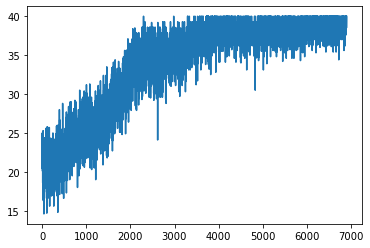

[[0.9870271  0.00479555 0.00817728]
 [0.70072424 0.12757379 0.171702  ]
 [0.8756155  0.05831088 0.06607365]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


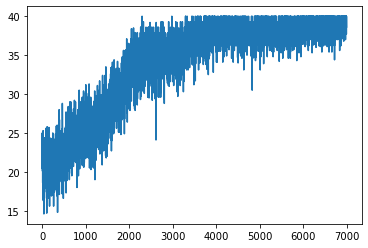

[[0.98704636 0.00475231 0.00820132]
 [0.7116123  0.12533383 0.16305386]
 [0.8742519  0.06005835 0.06568974]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


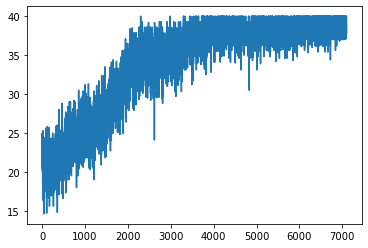

[[0.9873926  0.00449342 0.00811397]
 [0.6896979  0.13835503 0.17194708]
 [0.8749818  0.06022367 0.06479457]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


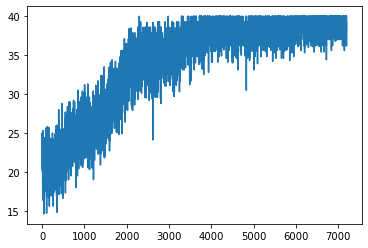

[[0.98752815 0.00455509 0.0079168 ]
 [0.69316167 0.13521324 0.17162502]
 [0.87671876 0.05947212 0.0638092 ]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


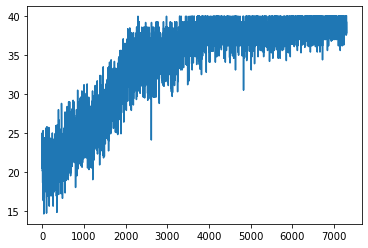

[[0.9890778  0.00383217 0.00708999]
 [0.70668465 0.13055964 0.16275574]
 [0.8796114  0.05835611 0.06203257]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0]


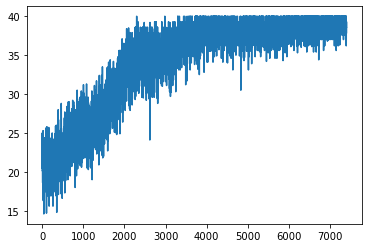

[[0.99006516 0.00354879 0.00638608]
 [0.7168297  0.12698165 0.15618873]
 [0.87788707 0.05928409 0.06282884]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


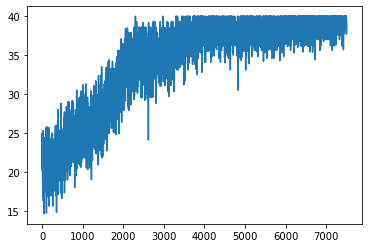

[[0.99136716 0.00319141 0.00544133]
 [0.7287467  0.12069992 0.15055333]
 [0.88404316 0.05634458 0.05961221]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


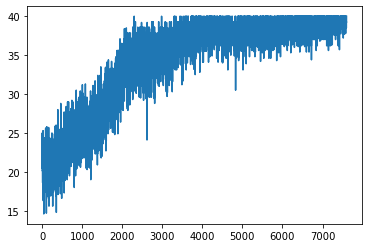

[[0.99189985 0.00310477 0.00499545]
 [0.72705287 0.12694559 0.14600153]
 [0.8846953  0.05517565 0.06012905]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


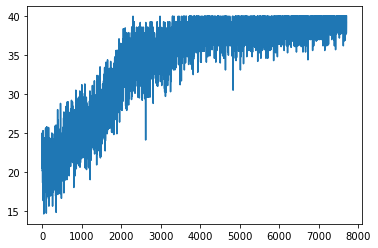

[[0.9919572  0.00306858 0.00497416]
 [0.7208457  0.13141043 0.14774397]
 [0.88552207 0.05460608 0.05987186]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


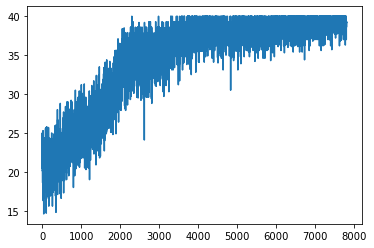

[[0.9908785  0.00328345 0.0058381 ]
 [0.7065859  0.13810116 0.155313  ]
 [0.88499415 0.05473219 0.06027369]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


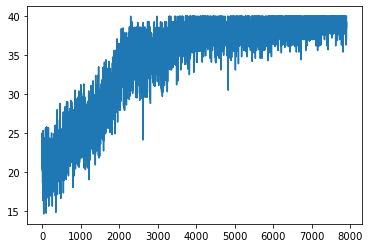

[[0.99034154 0.00315793 0.00650048]
 [0.7072554  0.13598299 0.15676153]
 [0.8812938  0.056576   0.06213022]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


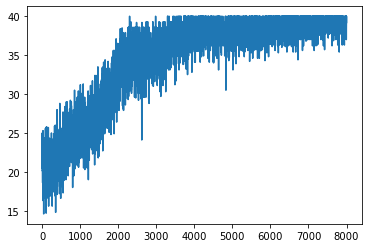

[[0.9894701  0.00335991 0.00716996]
 [0.71917427 0.1320438  0.14878199]
 [0.8736294  0.06078145 0.06558907]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


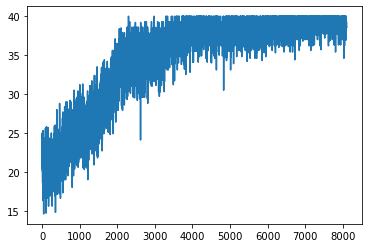

[[0.98913574 0.00334694 0.00751723]
 [0.72722393 0.1298133  0.14296275]
 [0.87282693 0.06099548 0.06617761]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


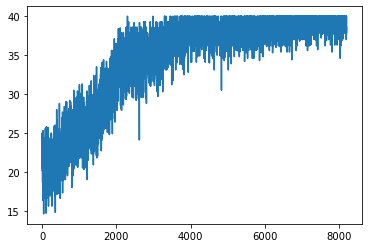

[[0.9888411  0.0034472  0.00771164]
 [0.74177927 0.1246675  0.13355316]
 [0.875683   0.05898312 0.06533392]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


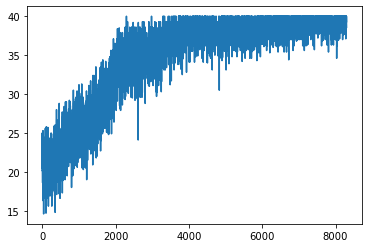

[[0.9900973  0.00306151 0.00684124]
 [0.7385348  0.12452426 0.1369409 ]
 [0.87575954 0.05977157 0.0644689 ]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


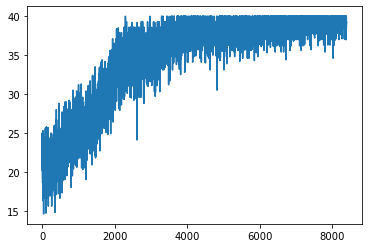

[[0.98971343 0.00313546 0.00715117]
 [0.7467505  0.12144089 0.13180867]
 [0.8810499  0.0573019  0.06164823]]
[0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


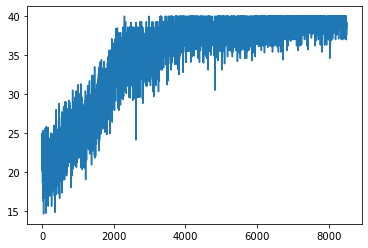

[[0.98997164 0.00310946 0.00691893]
 [0.7496113  0.12178592 0.12860277]
 [0.8850848  0.05564152 0.05927366]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


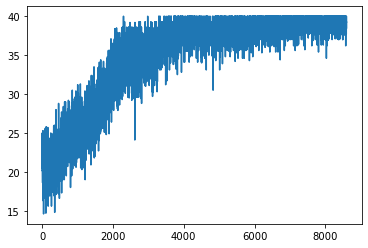

[[0.99069184 0.00298175 0.00632634]
 [0.7467485  0.12044322 0.13280834]
 [0.88724446 0.05400406 0.05875144]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


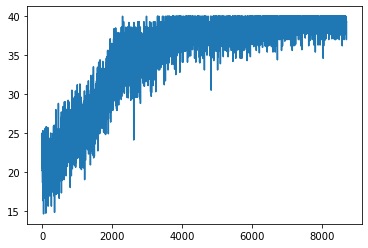

[[0.99066895 0.00313318 0.00619786]
 [0.75905085 0.11679386 0.1241553 ]
 [0.8920963  0.0517316  0.05617211]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


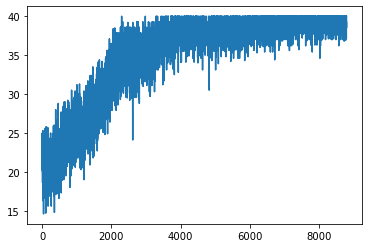

[[0.9905007  0.00312611 0.00637324]
 [0.76312464 0.11449394 0.12238136]
 [0.8883271  0.05380428 0.05786858]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


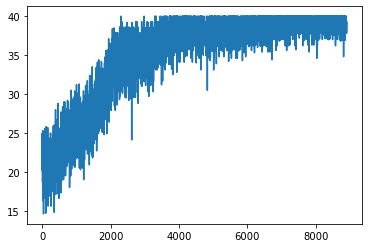

[[0.9906343  0.00313483 0.00623091]
 [0.76623875 0.11368835 0.12007293]
 [0.8841109  0.05611964 0.05976936]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


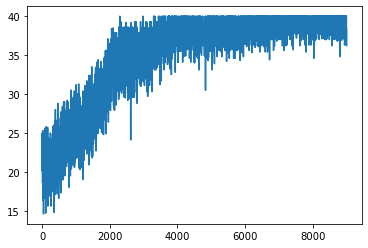

[[0.98943454 0.00348251 0.00708299]
 [0.7742065  0.11003438 0.11575916]
 [0.8793011  0.0578379  0.0628611 ]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


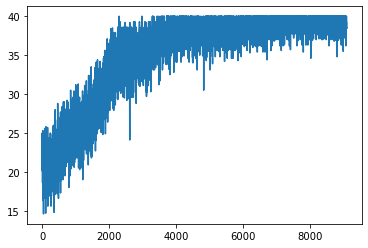

[[0.98991895 0.00333392 0.00674711]
 [0.7733734  0.10808619 0.11854035]
 [0.87548614 0.06161598 0.06289791]]
[0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


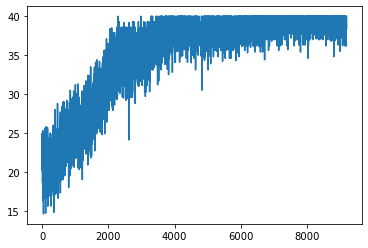

[[0.99040514 0.00312    0.00647484]
 [0.7700741  0.10765504 0.12227079]
 [0.8805737  0.05956995 0.05985644]]
[0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


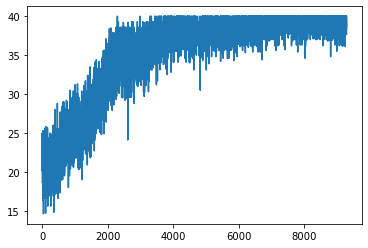

[[0.9910285  0.00301888 0.00595271]
 [0.7721595  0.10579301 0.12204754]
 [0.87721425 0.06171384 0.0610719 ]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


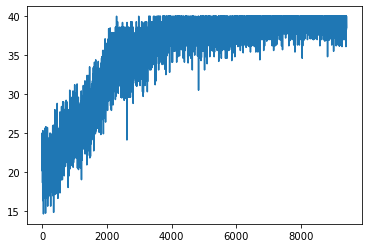

[[0.99118984 0.00300739 0.0058028 ]
 [0.76506436 0.10814391 0.12679176]
 [0.877513   0.06086311 0.06162398]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


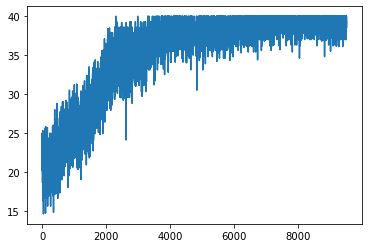

[[0.9919849  0.00281441 0.00520064]
 [0.76949465 0.10527118 0.12523423]
 [0.88277674 0.05826034 0.05896296]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


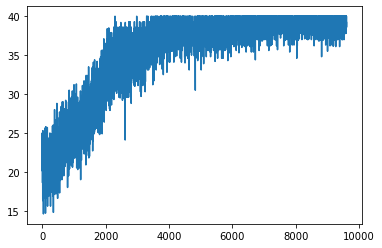

[[0.9925604  0.00257341 0.00486626]
 [0.7667761  0.10414819 0.1290757 ]
 [0.88099647 0.05776841 0.06123509]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


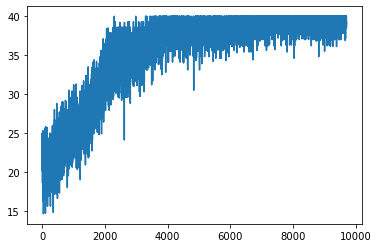

[[0.99225605 0.00260024 0.00514365]
 [0.76965517 0.10338225 0.12696253]
 [0.8815797  0.05821366 0.06020667]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


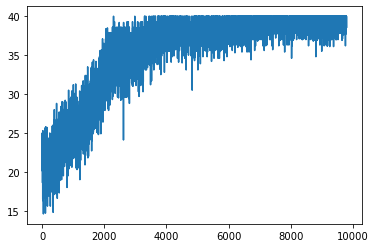

[[0.9932781  0.00240257 0.00431924]
 [0.7691093  0.10466509 0.12622567]
 [0.8810755  0.05802982 0.06089465]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


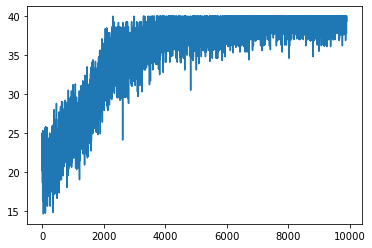

[[0.992959   0.00246854 0.00457249]
 [0.76243335 0.10776082 0.12980586]
 [0.88625187 0.05576214 0.05798607]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


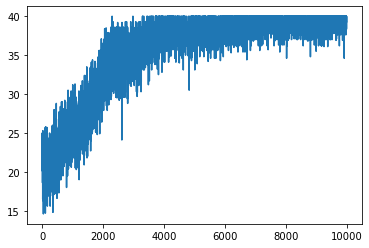

In [6]:
%matplotlib inline
from lxmls.reinforcement_learning.score_function_estimator import train
train()

# Value Iteration



In [10]:
import numpy as np

raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
gamma = 0.1

state_value_function = np.zeros(3)
print('V_{} = {}'.format(0, state_value_function))
for i in range(1000):
    for s in range(3):
        Q_s = [raw_rewards[s_next] + gamma * state_value_function[s_next]
               for s_next in range(3)]
        state_value_function[s] = max(Q_s)
    if i % 100 == 99:
        print('V_{} = {}'.format(i + 1, state_value_function))

V_0 = [0. 0. 0.]
V_100 = [22.03703704 22.03703704 22.03703704]
V_200 = [22.03703704 22.03703704 22.03703704]
V_300 = [22.03703704 22.03703704 22.03703704]
V_400 = [22.03703704 22.03703704 22.03703704]
V_500 = [22.03703704 22.03703704 22.03703704]
V_600 = [22.03703704 22.03703704 22.03703704]
V_700 = [22.03703704 22.03703704 22.03703704]
V_800 = [22.03703704 22.03703704 22.03703704]
V_900 = [22.03703704 22.03703704 22.03703704]
V_1000 = [22.03703704 22.03703704 22.03703704]


# 6.4 Policy Gradient for the CartPole task
Implement policy gradient for the cartpole task by coding the forward pass of Model() in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

env.action_space Discrete(2)
env.observation_space Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
env.observation_space.high [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


/home/dsilva/miniconda3/envs/lxmls/lib/python3.6/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/dsilva/projects/lxmls-toolkit/lxmls/reinforcement_learning/policy_gradient.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))


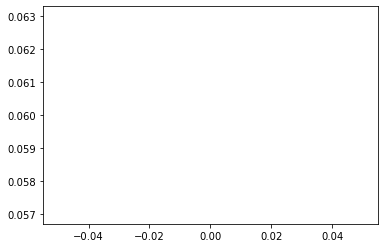

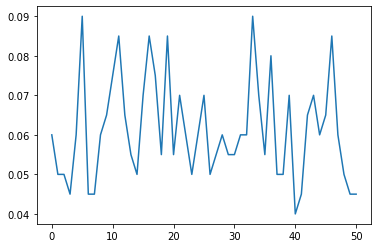

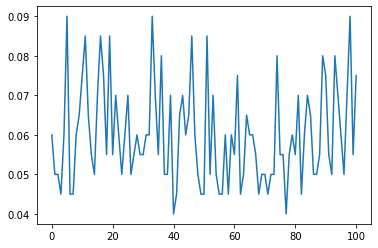

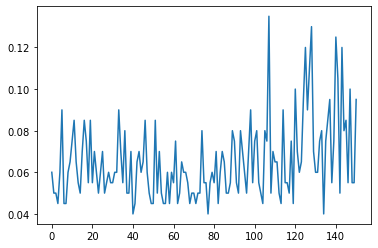

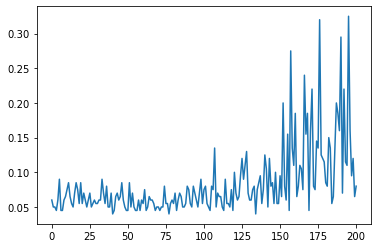

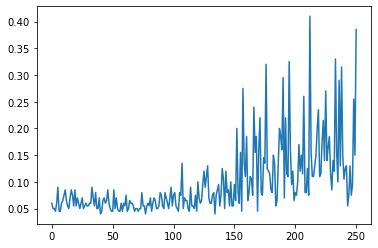

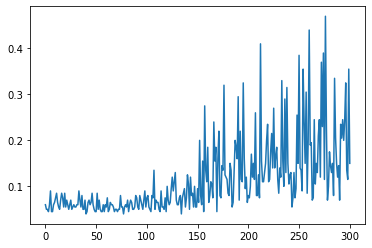

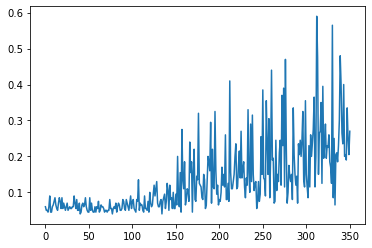

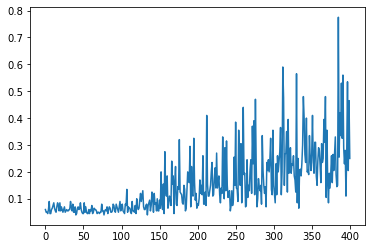

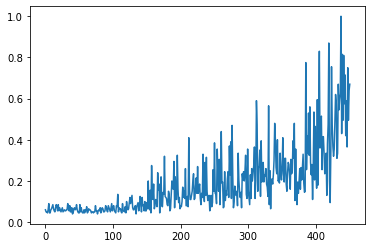

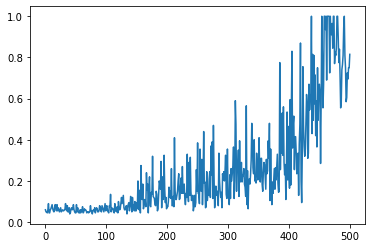

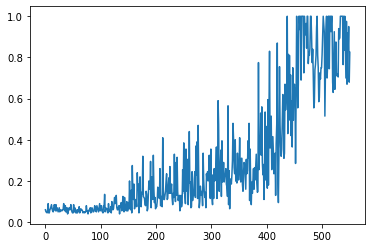

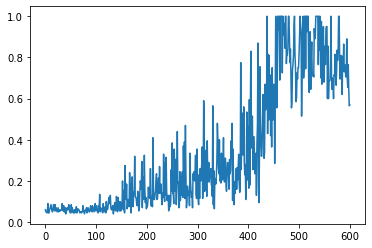

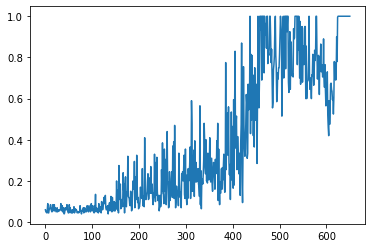

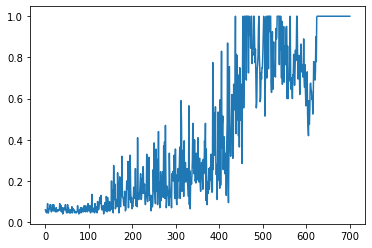

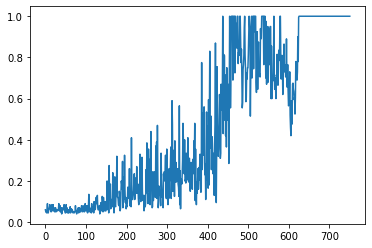

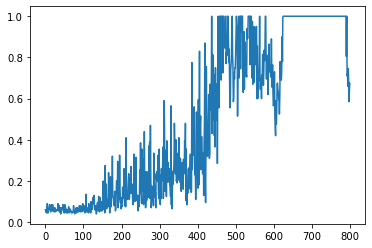

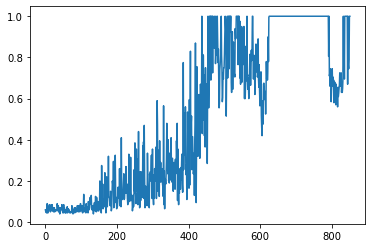

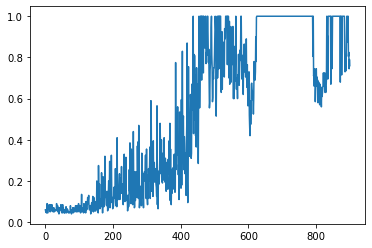

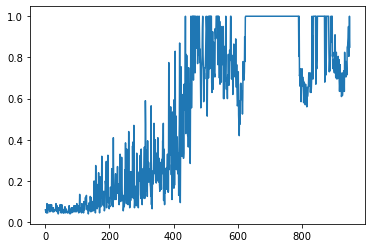

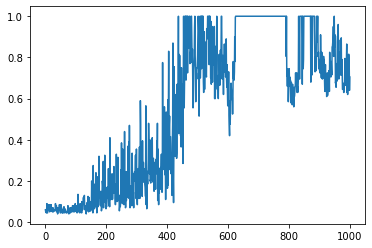

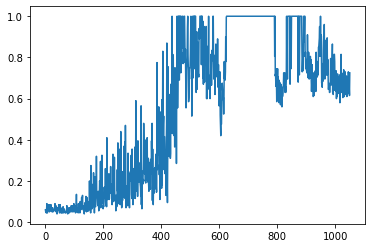

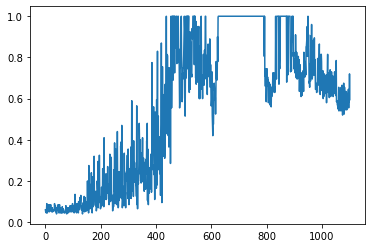

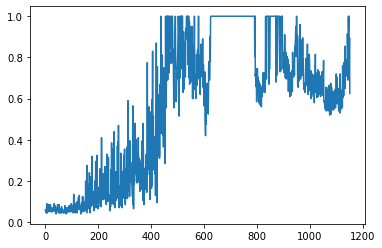

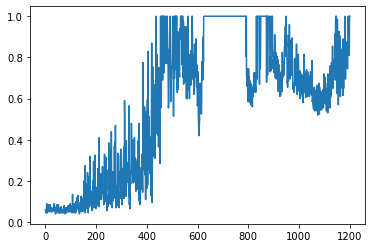

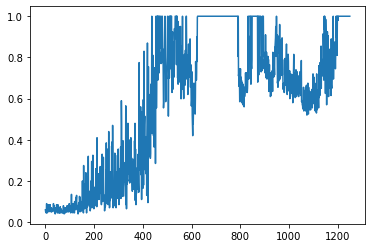

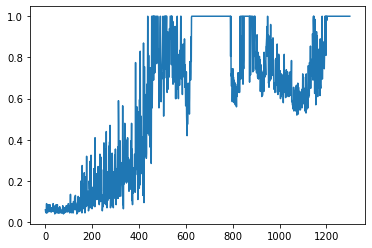

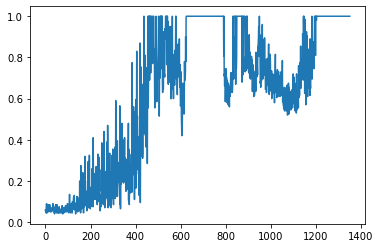

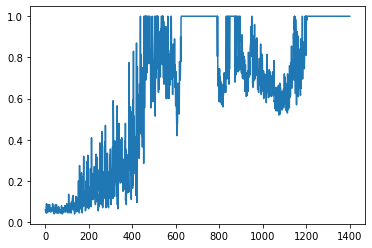

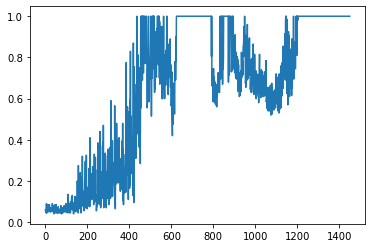

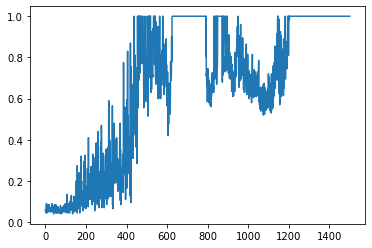

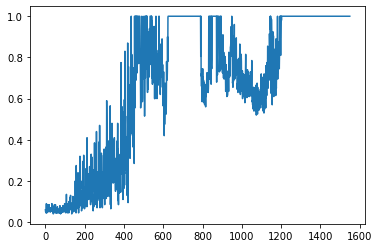

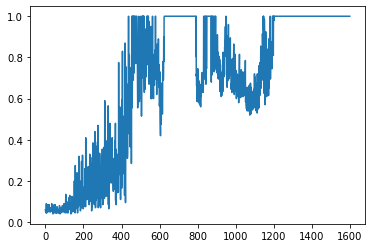

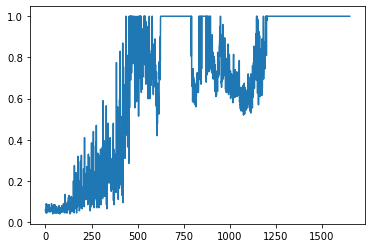

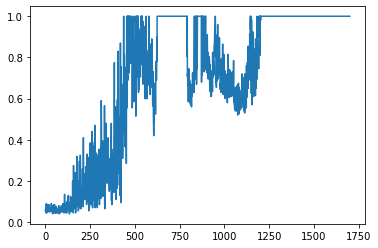

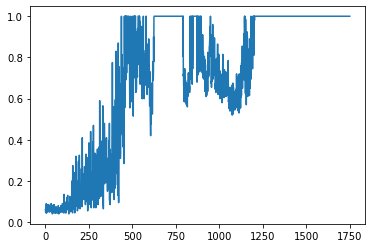

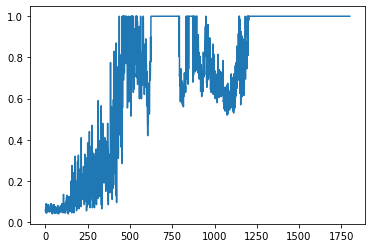

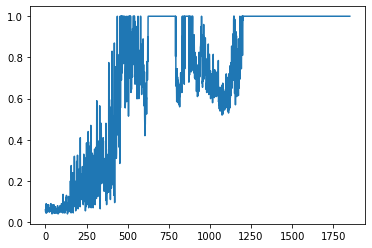

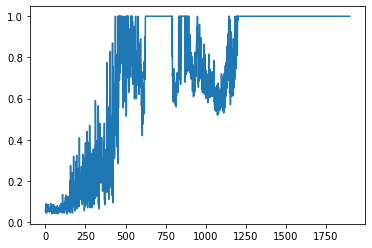

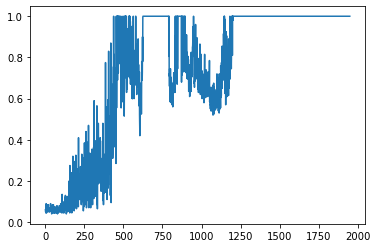

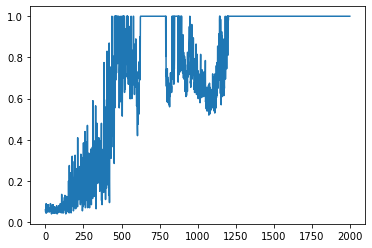

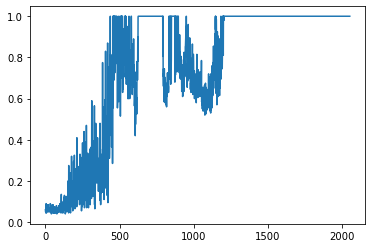

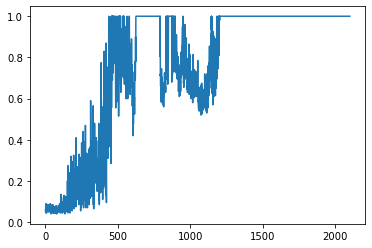

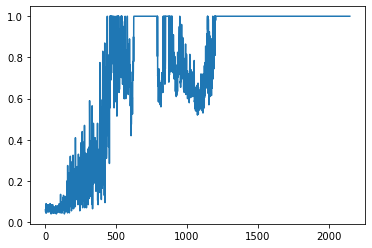

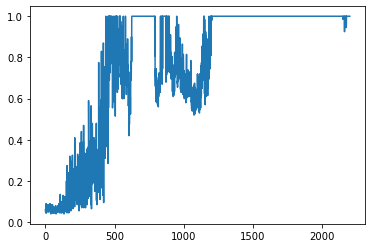

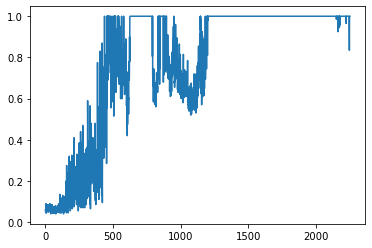

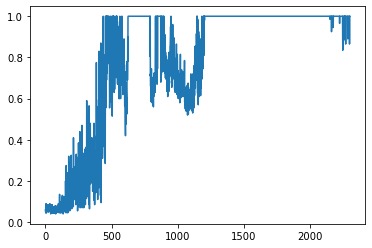

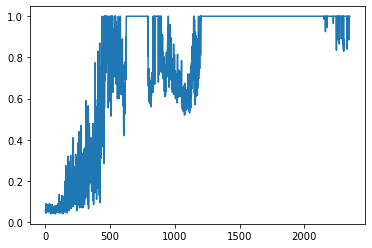

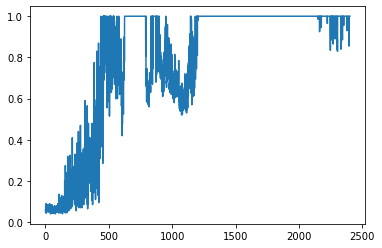

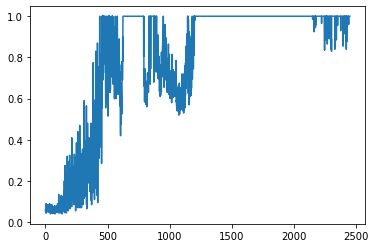

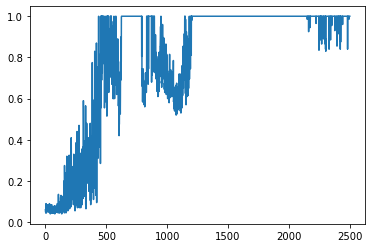

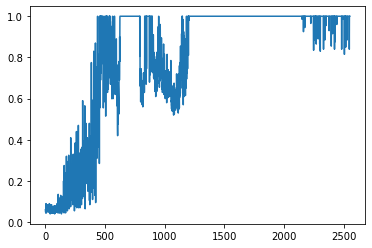

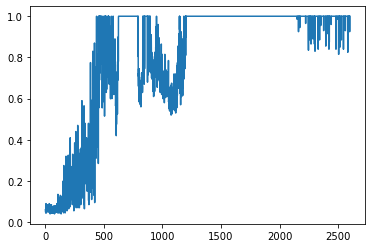

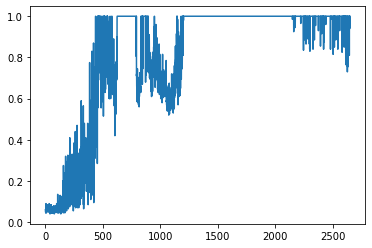

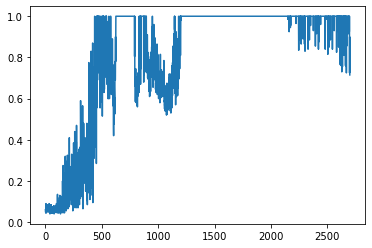

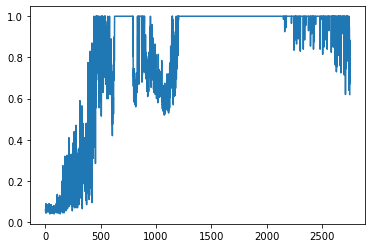

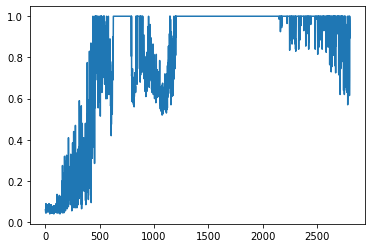

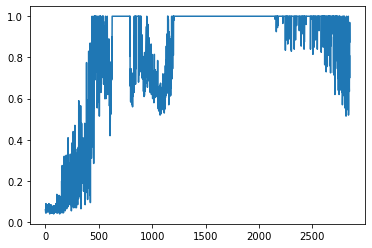

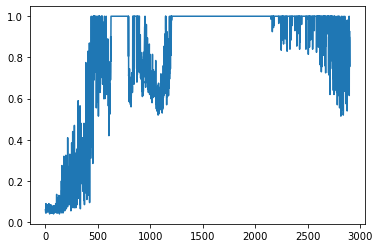

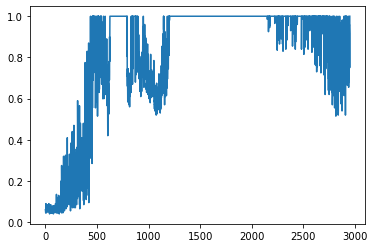

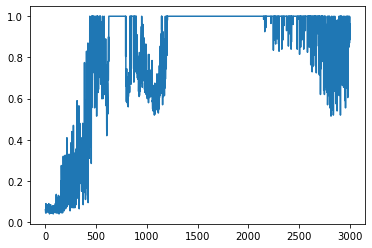

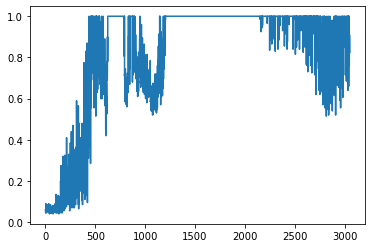

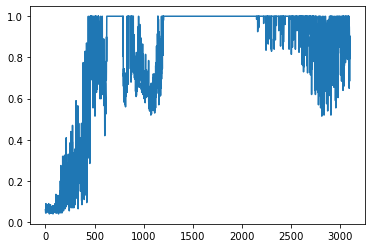

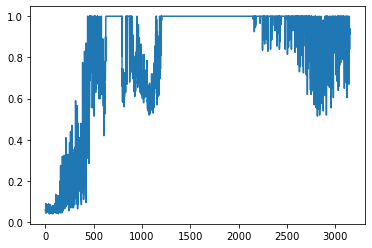

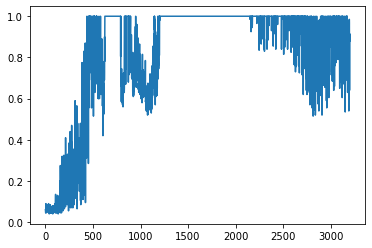

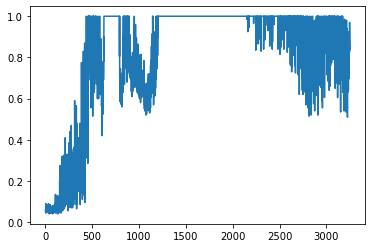

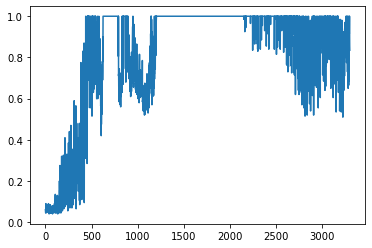

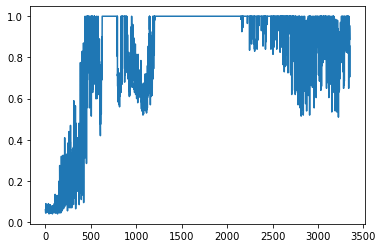

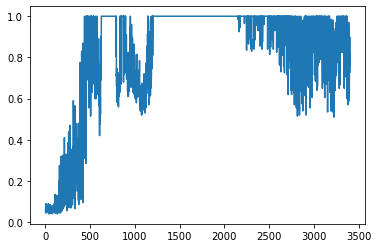

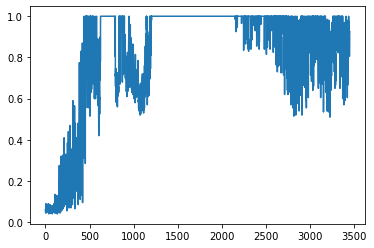

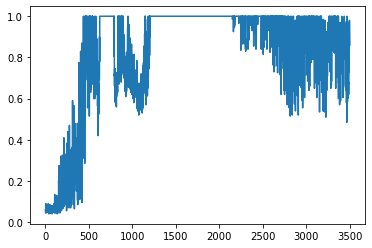

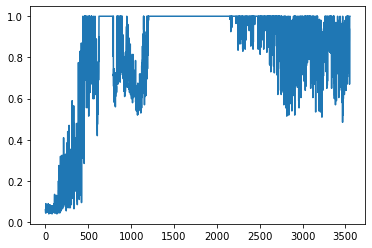

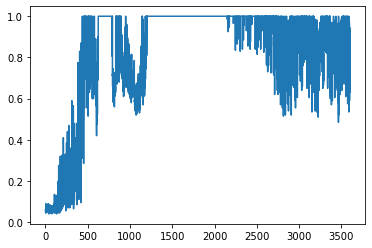

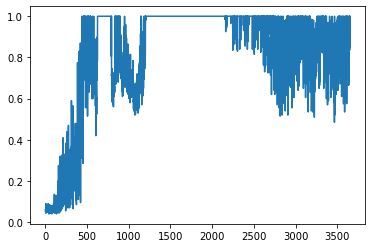

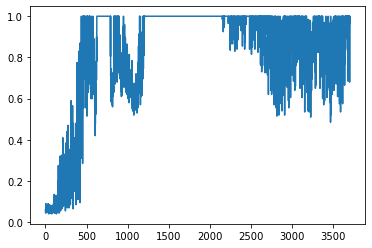

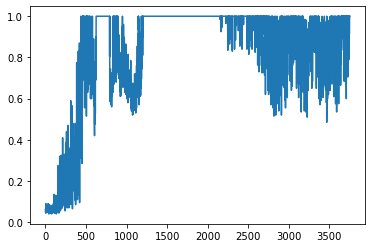

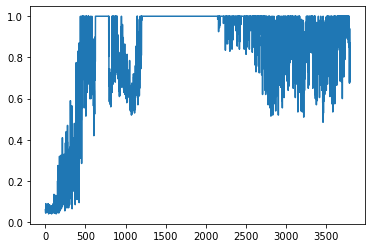

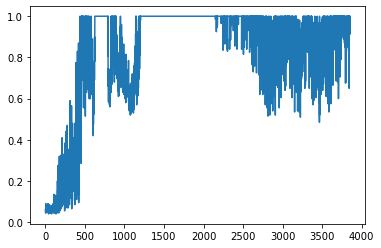

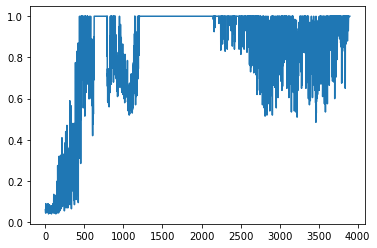

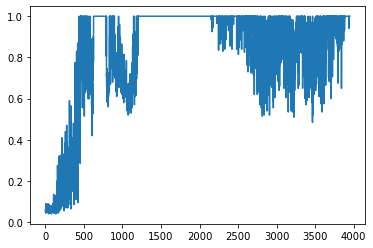

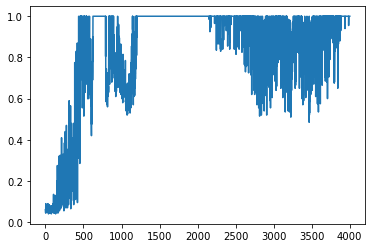

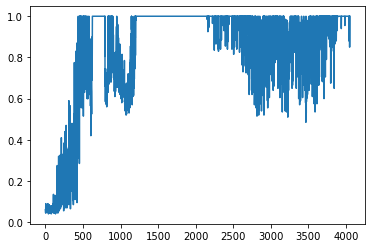

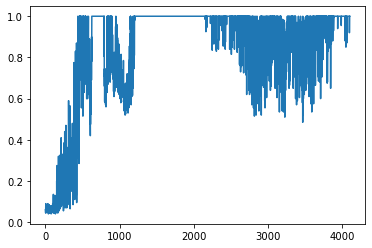

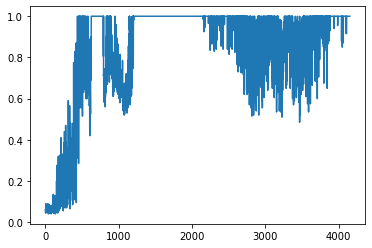

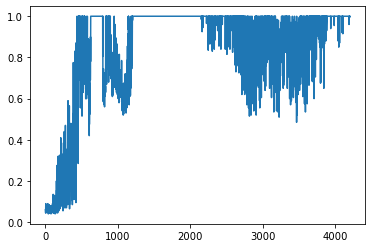

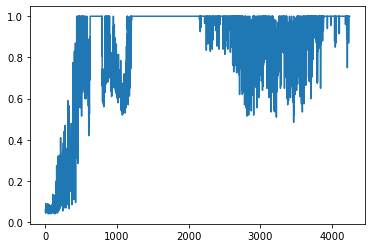

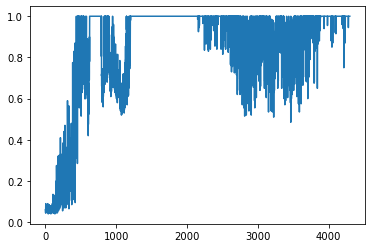

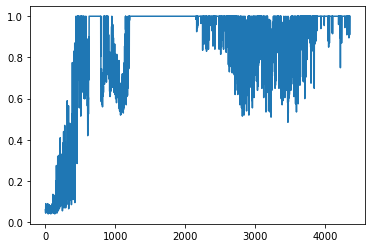

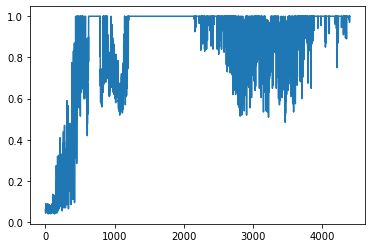

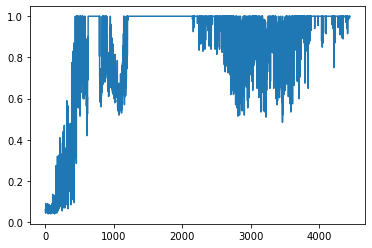

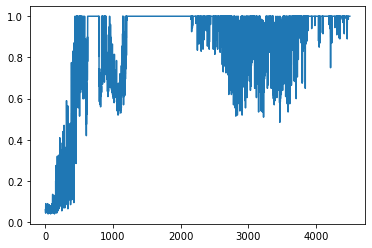

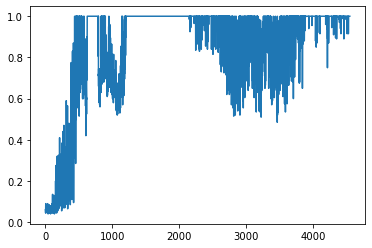

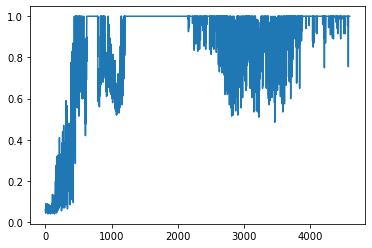

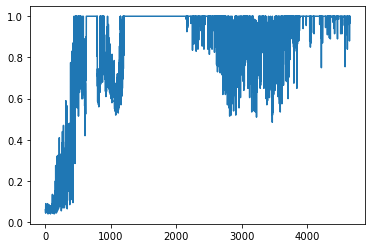

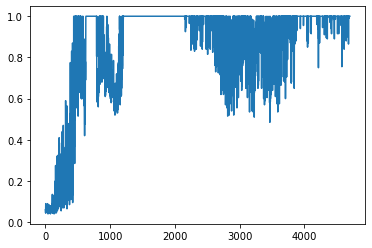

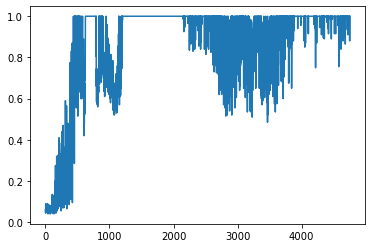

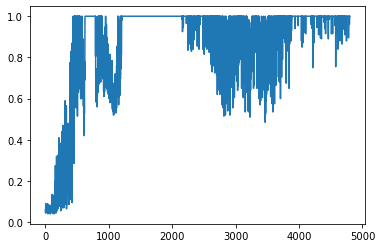

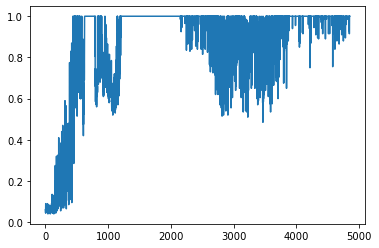

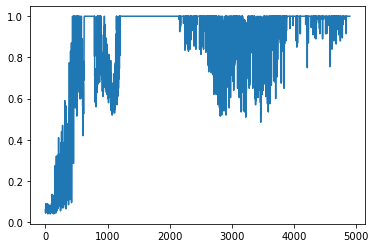

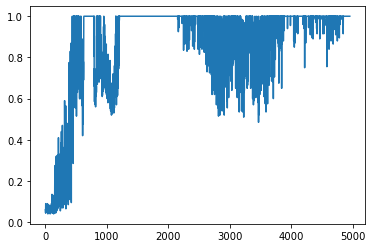

In [11]:
from lxmls.reinforcement_learning.policy_gradient import train
train()

# Extra: Actor Critic for the CartPole task
Implement actor crtitic for the cartpole task by coding the critic forward pass in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

In [ ]:
from lxmls.reinforcement_learning.actor_critic import train
train()